### I work with data from CIA World Factbook, a compendium of statistics about all of the countries on Earth. It contains demographic information like:
    1. Population - The population as of 2015
    2. Population growth - The annual population growth rate
    3. area - The total land and water area


In [2]:
#Import libraries
import pandas as pd
import sqlite3
#Get connection to the database
conn = sqlite3.connect("factbook.db")

### Get information about tables in the database using pandas.

In [3]:
#Define query
query = "SELECT * FROM sqlite_master WHERE type = 'table'"
pd.read_sql_query(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


### Query the facts table and get the first 5 rows as pandas dataframe.

In [4]:
query = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


### Query to get minimum population

In [5]:
query = "SELECT name, MIN(population) FROM facts"
pd.read_sql_query(query, conn)

,name,MIN(population)
0,Antarctica,0


### Query to get maximum population

In [6]:
query = "SELECT name, MAX(population) FROM facts Where name <> 'World'"
pd.read_sql_query(query, conn)

,name,MAX(population)
0,China,1367485388


### Query to get minimum population growth

In [7]:
query = "SELECT name, MIN(population_growth) FROM facts"
pd.read_sql_query(query, conn)

,name,MIN(population_growth)
0,Holy See (Vatican City),0.0


### Query to get maximum population growth

In [8]:
query = "SELECT name, MAX(population_growth) FROM facts"
pd.read_sql_query(query, conn)

,name,MAX(population_growth)
0,South Sudan,4.02


## There are some invalid data in the facts table. Lets see these data first.

### Query to get the countries with population of 0.

In [9]:
query = "SELECT name, population FROM facts WHERE population = 0"
pd.read_sql_query(query, conn)

,name,population
0,Antarctica,0


### Query to return the countries with a population of more thatn 7 billion.

In [10]:
query = "SELECT name, population FROM facts WHERE population > 7000000000"
pd.read_sql_query(query, conn)

,name,population
0,World,7256490011


### Antartica has population of 0 and World which I think is all the countries in the world has population over 7 billion.

## Ignoring outlier values(World and Antartica) generate histogram from pandas dataframe for some columns.

In [11]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f186b4d0a90>,
      dtype=object)

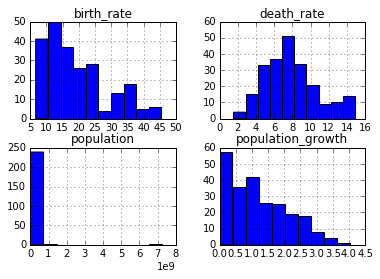

In [12]:
query = "SELECT * FROM facts WHERE name <> 'World' or name <> 'Antartica' "
population_df = pd.read_sql_query(query, conn)
population_df
population_df.hist(column = ['population', 'population_growth','birth_rate','death_rate'], layout = (2,2))